In [0]:
import keras
print(keras.__version__)
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
files.upload()

2.2.4


Saving USD_INR.csv to USD_INR (1).csv


{'USD_INR.csv': b'"Date","Price","Open","High","Low","Change %"\n"Aug 10, 2017","64.165","63.898","64.175","63.855","0.48"\n"Aug 09, 2017","63.860","63.780","63.860","63.710","0.26"\n"Aug 08, 2017","63.692","63.750","63.785","63.615","-0.23"\n"Aug 07, 2017","63.840","63.710","63.865","63.648","0.26"\n"Aug 04, 2017","63.675","63.670","63.786","63.572","-0.05"\n"Aug 03, 2017","63.705","63.630","63.720","63.560","0.11"\n"Aug 02, 2017","63.635","64.120","64.135","63.590","-0.72"\n"Aug 01, 2017","64.095","64.100","64.145","64.040","-0.16"\n"Jul 31, 2017","64.200","64.110","64.272","64.045","0.13"\n"Jul 28, 2017","64.115","64.190","64.245","64.105","-0.02"\n"Jul 27, 2017","64.125","64.180","64.218","64.060","-0.36"\n"Jul 26, 2017","64.355","64.430","64.487","64.313","-0.05"\n"Jul 25, 2017","64.385","64.350","64.425","64.340","-0.02"\n"Jul 24, 2017","64.395","64.410","64.465","64.295","0.02"\n"Jul 21, 2017","64.385","64.380","64.390","64.300","0.02"\n"Jul 20, 2017","64.375","64.340","64.460",

In [0]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))  
  
usdinr = pd.read_csv('USD_INR.csv')

usdinr["Date"] = pd.to_datetime(usdinr["Date"])
usdinr.head()
ind_exchange_data = usdinr.set_index(["Date"], drop = True)
ind_exchange_data.head()

,Price,Open,High,Low,Change %
Date,,,,,
2017-08-10,64.165,63.898,64.175,63.855,0.48
2017-08-09,63.860,63.780,63.860,63.710,0.26
2017-08-08,63.692,63.750,63.785,63.615,-0.23
2017-08-07,63.840,63.710,63.865,63.648,0.26
2017-08-04,63.675,63.670,63.786,63.572,-0.05


In [0]:
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=True)
data_frame.head()

,Change %,High,Low,Open,Price
Date,,,,,
2017-08-10,0.48,64.175,63.855,63.898,64.165
2017-08-09,0.26,63.860,63.710,63.780,63.860
2017-08-08,-0.23,63.785,63.615,63.750,63.692
2017-08-07,0.26,63.865,63.648,63.710,63.840
2017-08-04,-0.05,63.786,63.572,63.670,63.675


In [0]:
data_frame = data_frame.iloc[::-1]
data_frame.head()

,Change %,High,Low,Open,Price
Date,,,,,
1980-01-02,0.00,8.00,8.00,8.00,8.00
1980-01-03,-0.63,7.95,7.95,7.95,7.95
1980-01-04,1.26,8.05,8.05,8.05,8.05
1980-01-07,0.00,8.05,8.05,8.05,8.05
1980-01-08,0.00,8.05,8.05,8.05,8.05


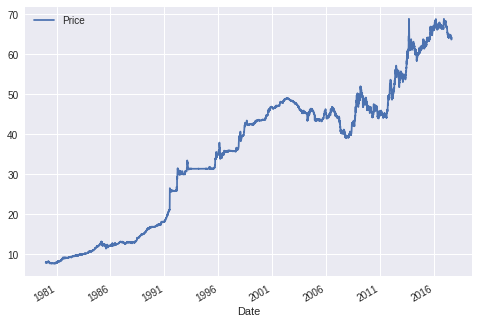

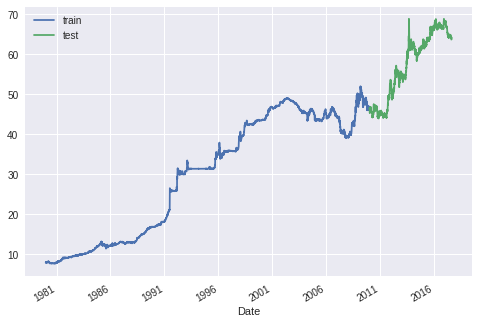

In [0]:
df = data_frame[["Price"]]
df.plot()
split_date = pd.Timestamp('01-01-2010')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [0]:
X_train_ann = train_sc[:-1]
y_train_ann = train_sc[1:]
X_test_ann = test_sc[:-1]
y_test_ann = test_sc[1:]
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model



model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train_ann, y_train_ann, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/200
7712/7712 [==============================] - 6s 822us/step - loss: 1.7679e-05
Epoch 2/200
7712/7712 [==============================] - 6s 723us/step - loss: 2.4265e-04
Epoch 3/200
7712/7712 [==============================] - 6s 722us/step - loss: 8.0999e-05
Epoch 00003: early stopping


In [0]:
y_pred_test_ann = model.predict(X_test_ann)
y_train_pred_ann = model.predict(X_train_ann)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train_ann, y_train_pred_ann)))
r2_train = r2_score(y_train_ann, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train_ann.shape[0], X_train_ann.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test_ann, y_pred_test_ann)))
r2_test = r2_score(y_test_ann, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test_ann.shape[0], X_test_ann.shape[1])))

model.save('ANN')


The R2 score on the Train set is:	0.924
The Adjusted R2 score on the Train set is:	0.924

The R2 score on the Test set is:	0.900
The Adjusted R2 score on the Test set is:	0.900


In [0]:
import numpy as np
X = train_sc[:7653]
for i in range(1,50):
  A = train_sc[i:7653+i]
  X = np.hstack((A,X)) 

  
X = X.reshape(7653,50,1)
print(X.shape)

y_train = X[:,-1,:]
print(y_train.shape)
y_train = y_train.reshape(7653) 
print(y_train.shape)
  
x_train = X[:,:-1,:]
print(x_train.shape)



(7653, 50, 1)
(7653, 1)
(7653,)
(7653, 49, 1)


In [0]:
model = Sequential()
model.add(LSTM(input_shape = (49,1), output_dim= 49, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(49, 1), return_sequences=True, units=49)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 49, 49)            9996      
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               313344    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 323,597
Trainable params: 323,597
Non-trainable params: 0
_________________________________________________________________


In [0]:
import time
start = time.time()
model.fit(x_train,y_train,batch_size=512,nb_epoch=5,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)
model.save('LSTM')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 6887 samples, validate on 766 samples
Epoch 1/5
6887/6887 [==============================] - 21s 3ms/step - loss: 0.0034 - val_loss: 2.8487e-04
Epoch 2/5
6887/6887 [==============================] - 21s 3ms/step - loss: 0.0032 - val_loss: 3.2886e-04
Epoch 3/5
6887/6887 [==============================] - 21s 3ms/step - loss: 0.0031 - val_loss: 1.9685e-04
Epoch 4/5
6887/6887 [==============================] - 21s 3ms/step - loss: 0.0030 - val_loss: 1.8710e-04
Epoch 5/5
6887/6887 [==============================] - 21s 3ms/step - loss: 0.0029 - val_loss: 5.5229e-04
> Compilation Time :  106.50379467010498


In [0]:
x_test = test_sc[:1935]
x_test.shape
for i in range(1,50):
  B = train_sc[i:1935+i]
  x_test = np.hstack((B,x_test)) 

  
x_test = x_test.reshape(1935,50,1)
print(x_test.shape)

y_test = x_test[:,-1,:]
print(y_test.shape)
y_test = y_test.reshape(1935) 
print(y_test.shape)
  
x_test = x_test[:,:-1,:]
print(x_train.shape)



(1935, 50, 1)
(1935, 1)
(1935,)
(7653, 49, 1)


In [0]:
x_train.shape[0]

7653

In [0]:
model_ann = load_model('ANN')
model_lstm = load_model('LSTM')
score_ann= model_ann.evaluate(X_test_ann, y_test_ann, batch_size=1)
score_lstm= model_lstm.evaluate(x_test, y_test, batch_size=1)


1935/1935 [==============================] - 19s 10ms/step


In [0]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)

ANN: 0.003334
LSTM: 1.134302


In [0]:
#turns out the sliding window technique doesn't work. 

#LSTMs do not require a sliding window of inputs. They can remember what they have seen in the past, and if you feed
#in training examples one at a time they will choose the right size window of inputs to remember on their own.

#LSTM's are already prone to overfitting, and if you feed in lots of redundant data with a sliding window then yes, they are likely to overfit.
X_train_ann.shape[1]

In [0]:

X_tr_t = X_train_ann.reshape(X_train_ann.shape[0], 1, X_train_ann.shape[1])
X_tst_t = X_test_ann.reshape(X_test_ann.shape[0], 1, X_test_ann.shape[1])
from keras.layers import LSTM
K.clear_session()
model_lstm1 = Sequential()
model_lstm1.add(LSTM(7, input_shape=(1, X_train_ann.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm1.add(Dense(1))
model_lstm1.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm1.fit(X_tr_t, y_train_ann, epochs=2, batch_size=1, verbose=1, shuffle=False)
model_lstm1.summary()
y_pred_test_lstm = model_lstm1.predict(X_tst_t)
y_train_pred_lstm = model_lstm1.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train_ann, y_train_pred_lstm)))
r2_train = r2_score(y_train_ann, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train_ann.shape[0], X_train_ann.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test_ann, y_pred_test_lstm)))
r2_test = r2_score(y_test_ann, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test_ann.shape[0], X_test_ann.shape[1])))

Epoch 1/2
7712/7712 [==============================] - 14s 2ms/step - loss: 5.0259e-05
Epoch 2/2
7712/7712 [==============================] - 15s 2ms/step - loss: 0.0028
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________
The R2 score on the Train set is:	0.652
The Adjusted R2 score on the Train set is:	0.652

The R2 score on the Test set is:	0.980
The Adjusted R2 score on the Test set is:	0.980


In [0]:
model_lstm1.save('LSTM2')



In [0]:
model_ann = load_model('ANN')
model_rnn = load_model('LSTM2')
score_ann= model_ann.evaluate(X_test_ann, y_test_ann, batch_size=1)
score_lstm= model_rnn.evaluate(X_tst_t, y_test_ann, batch_size=1)

1984/1984 [==============================] - 1s 756us/step


In [0]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)

ANN: 0.003334
LSTM: 0.000672


In [0]:
!pip install openpyxl

    100% |████████████████████████████████| 174kB 6.8MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/eb/82/e4/07e495a24598349a360894047b388a85aaa6a4d488807a6494
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /root/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


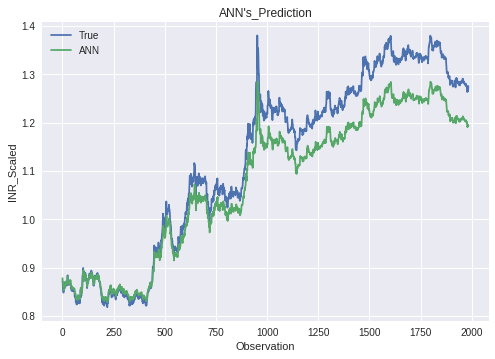

In [0]:
import openpyxl
y_pred_test_ANN = model_ann.predict(X_test_ann)
y_pred_test_LSTM = model_rnn.predict(X_tst_t)
col1 = pd.DataFrame(y_test_ann, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN_prediction'])
col3 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])
col4 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])
col5 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3, col4, col5], axis=1)
results.to_excel('PredictionResults_ANN-LSTM_NonShift.xlsx')
plt.plot(y_test_ann, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


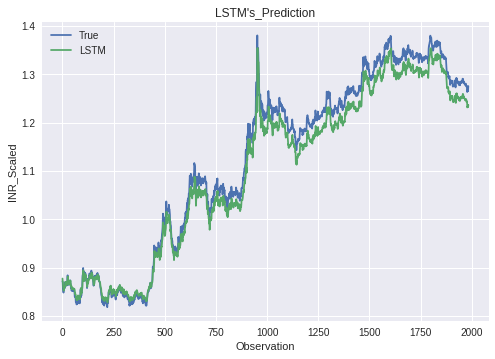

In [0]:
plt.plot(y_test_ann, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()